# Stochastic Processes: <br>Data Analysis and Computer Simulation
<br>


# Distribution function and random number
<br>


# 4. Random walk
<br>

# 4.1. The model system (1D random walk)

![](fig/random_walk.png)



# 4.2. As binomial distribution

- The total number of steps to the right: $n_+$
- The total number of steps to the left: $n_-$
- The total number of steps: $m=n_+ + n_-$
- The current location: $l=n_+ - n_-$

\begin{equation}
\therefore \ \ \ n_+=\frac{m+l}{2}, \ \ \ \ \ \ n_-=\frac{m-l}{2}\tag{E1}
\end{equation}

\begin{equation}
%\tilde
{P}(l,m)\rightarrow P_{\rm Binomial}(n_+;m)
%\frac{dn_+}{dl}
=P_{\rm Binomial}(n_-;m)
%\frac{dn_-}{dl}
\tag{E2}
\end{equation}

\begin{equation}
\hspace{20mm}
=
%\frac{1}{2}
\frac{m!}{n_+!(m-n_+)!}{{p}^{n_+}}{{(1-p)}^{m-n_+}}\tag{E3}
\end{equation}

# 4.3. As normal distribution (for $n_+,m\gg 1$)
\begin{equation}
P_{\rm Binomial}(n_+;m)
%\xrightarrow[n_+\to cont.]{n_+,m\gg 1}\ 
\simeq
\frac{1}{\sqrt{2\pi {{\sigma'}^{2}}}}\exp \left[ -\frac{{{(n_+-{{\mu' }_{1}})}^{2}}}{2{{\sigma' }^{2}}} \right]\tag{E4}
\end{equation}

\begin{equation}
{\rm with}\hspace{5mm}
\mu_1'=\langle n_+\rangle=mp,\ \ \ 
\sigma'^2=\langle n_+^2\rangle - \langle n_+\rangle^2=mp(1-p) \tag{E5, E6}
\end{equation}

Recall that $n_+=(m+l)~/~2$

\begin{equation}
P_{\rm Binomial}(n_+;m)
%\rightarrow\frac{1}{\sqrt{2\pi mp(1-p)}}
\simeq\exp \left[ -\frac{{{(l-{m(2p-1)})}^{2}}}{8mp(1-p)} \right]\tag{E7}
\end{equation}

\begin{equation}
\therefore \ \ 
%\tilde
{P}(l,m)= P_{\rm Binomial}(n_+;m)\frac{dn_+}{dl}
= P_{\rm Binomial}(n_+;m)\frac{1}{2}\tag{E8}
\end{equation}

\begin{equation}
\simeq\frac{1}{\sqrt{2\pi \sigma''^2}}
\exp \left[ -\frac{{{(l-{\mu''_1})}^{2}}}{2\sigma''^2} \right]\tag{E9}
\end{equation}

\begin{equation}
%\hspace{20mm}
{\rm with}\hspace{5mm}
\mu''_1=\langle l\rangle=m(2p-1),\ \ \ 
\sigma''^2=\langle l^2\rangle - \langle l\rangle^2=4mp(1-p) \tag{E10, E11}
\end{equation}

# 4.4. By computer simulation

In [1]:
%matplotlib inline
import numpy as np # import numpy library as np
import math # use mathematical functions defined by the C standard
import matplotlib.pyplot as plt # import pyplot library as plt 
plt.style.use('ggplot') # use "ggplot" style for graphs

p = 0.5 M = 1000


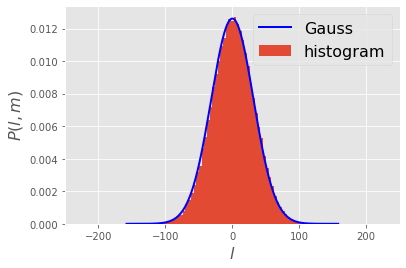

In [2]:
p = 0.5 # set p, propability to take a step to the right
M = 1000 # M = number of total steps
N = 100000 # N = number of independent random walkers
ave = M*(2*p-1) # average of the location L after M steps Eq.(E10)
std = np.sqrt(4*M*p*(1-p)) # standard deviation of L after M steps Eq.(E11)
print('p =',p,'M =',M)
L = np.zeros(N)
np.random.seed(0) # initialize the random number generator with seed=0
for i in range(N): # repeat independent random walks N times
    step=np.random.choice([-1,1],M) # generate random sampling from -1 or +1 M times and store them as step
    L[i]=np.sum(step) # calculate l after making M random steps and store it as L
nmin=np.int(ave-std*5)
nmax=np.int(ave+std*5)
nbin=np.int((nmax-nmin)/4)
plt.hist(L,range=[nmin,nmax],bins=nbin,density=True) # plot normalized histogram of L
x = np.arange(nmin,nmax,0.01/std) # create array of x from nmin to nmax with increment 0.01/std
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical distribution Eq.(E9)
plt.plot(x,y,lw=2,color='b') # plot y vs. x with blue line
plt.xlabel(r'$l$',fontsize=16) # set x-label
plt.ylabel(r'$P(l,m)$',fontsize=16) # set y-label
plt.legend([r'Gauss',r'histogram'], fontsize=16, loc=0) # set legends
plt.xlim(ave-250,ave+250) # set x-range
plt.show() # display plots

- You may repeat the same simulation by choosing different values of total steps, for example $M=100$, $1,000$, $10,000$, and $100,000$ to see how the distribution changes with the total number of steps.

# 4.5. Connection with the diffusion constant $D$

## $P(x,t)$ from random walk

- Define $a$ as the length of a single step and $t_s$ as the time between subsequent steps.
- Define $x=al$ as the position of the random walker and $t=t_s m$ as the duration of time needed to take $m$ steps.
- Here we consider a drift free case $p=0.5$, i.e., $\mu_1=\langle l\rangle=m(2p-1)=0$.

\begin{equation}
P(x,t)=P(l,m)\frac{dl}{dx}=P(l,m)\frac{1}{a}
\tag{E12}
\end{equation}

\begin{equation}
%P_{\rm Binomial}(n_+;m)\rightarrow
=\frac{1}{a\sqrt{8\pi mp(1-p)}}
\exp \left[ -\frac{{l^2}}{8mp(1-p)} \right]\tag{E13}
\end{equation}

\begin{equation}
%P_{\rm Binomial}(n_+;m)\rightarrow
=\frac{1}{\sqrt{8\pi a^2 p(1-p)t/t_s}}
\exp \left[ -\frac{{x^2}}{8a^2p(1-p)t/t_s} \right]\tag{E14}
\end{equation}

\begin{equation}
\hspace{-10mm}
{\rm with}\hspace{5mm}
\mu_1=\langle x\rangle=0,\ \  
\sigma^2=\langle x^2\rangle - \langle x\rangle^2=4a^2p(1-p)t/t_s \tag{E15, E16}
\end{equation}

## $P(x,t)$ from the diffusion equation

- Consier the 1-D diffusion equation with diffusion constant $D$ 
\begin{equation}
\frac{\partial}{\partial t} P(x,t)=D\frac{\partial ^2}{\partial x^2} P(x,t)
\tag{E17}
\end{equation}
\begin{equation}
{\rm with}\hspace{5mm}P(x,t=0)=\delta(x)
\tag{E18}
\end{equation}
- The solution is given by
\begin{equation}
P(x,t)=\frac{1}{\sqrt{4\pi Dt}}
\exp \left[ -\frac{{{x^2}}}{4Dt} \right]\tag{E19}
\end{equation}
- By comparing Eqs.(E14) and (E19) we can relate the diffusion constant $D$ to the variance of the position of random walkers
\begin{equation}
D=\frac{2a^2p(1-p)}{t_s}=\frac{\sigma^2}{2t}\tag{E20}
\end{equation}
- In this case, $\sigma^2$ is also referred to as the mean-square displacement